In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
import sys
import os
warnings.filterwarnings('ignore')

In [159]:
sys.path.append(os.path.abspath("..\src"))
from utils.ClaseAbdon import DataFrameAnalyzer

In [ ]:
tienda = pd.read_csv(r'..\data\raw\Merch_RAW.csv')

In [161]:
df = tienda.copy()

In [162]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [163]:
df.set_index('Order_ID',inplace=True)

In [164]:
df_ob = df.select_dtypes('object')
for col in df_ob.columns:
    print(f'==========={col}===========')
    print(f'Numero de unicos: {df[col].nunique()}')
    print(f'Valores Unicos: {df[col].unique()}')
    print('\n')

===========Product_ID===========
Numero de unicos: 13
Valores Unicos: ['BF1543' 'BF1544' 'BF1545' 'BF1546' 'BF1547' 'BF1548' 'BF1549' 'BF1550'
 'BF1551' 'BF1552' 'BF1553' 'BF1554' 'BF1555']


===========Product_Category===========
Numero de unicos: 3
Valores Unicos: ['Clothing' 'Other' 'Ornaments']


===========Buyer_Gender===========
Numero de unicos: 2
Valores Unicos: ['Male' 'Female']


===========Order_Location===========
Numero de unicos: 25
Valores Unicos: ['New Jersey' 'Las Vegas' 'Cardiff' 'Pittsburgh' 'Miami' 'Sydney'
 'Memphis' 'New York' 'Montreal' 'Sacramento' 'Paris' 'San Antonio'
 'Cleveland' 'London' 'Portland' 'Detroit' 'Dublin' 'Glasgow' 'Austin'
 'Toronto' 'Mumbai' 'San Francisco' 'Manchester' 'Liverpool' 'New Delhi']


===========International_Shipping===========
Numero de unicos: 2
Valores Unicos: ['No' 'Yes']




In [165]:
label = df[['Product_ID','Order_Location','International_Shipping','Buyer_Gender']]
label_encoder = LabelEncoder()

for col in label.columns:
    label[col] = label_encoder.fit_transform(label[col])
df.drop(columns=['Product_ID','Order_Location','International_Shipping','Buyer_Gender'],inplace=True)

df = pd.concat([df,label],axis=1)

In [166]:
df

,Order_Date,Product_Category,Buyer_Age,Sales_Price,Shipping_Charges,Sales_per_Unit,Quantity,Total_Sales,Rating,Product_ID,Order_Location,International_Shipping,Buyer_Gender
Order_ID,,,,,,,,,,,,,
189440,2024-07-21,Clothing,30,100,0,100,1,100,4,0,15,0,1
187385,2024-07-20,Clothing,32,100,0,100,1,100,3,0,6,0,1
181844,2024-07-21,Other,26,9,40,49,1,49,2,1,1,1,0
197934,2024-08-19,Other,28,9,0,9,2,18,3,1,18,0,1
122470,2024-01-06,Other,19,10,0,10,3,30,5,2,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136943,2023-12-10,Clothing,23,65,0,65,1,65,4,5,6,0,1
172276,2024-01-24,Clothing,26,118,40,158,1,158,4,3,9,1,0
160191,2023-12-19,Ornaments,19,45,0,45,1,45,2,9,11,0,1


In [167]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_array = encoder.fit_transform(df['Product_Category'].values.reshape(-1,1))

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(df[['Product_Category']].columns),index=df.index)
df = pd.concat([df,encoded_df],axis=1)
df.drop(columns='Product_Category',inplace=True)

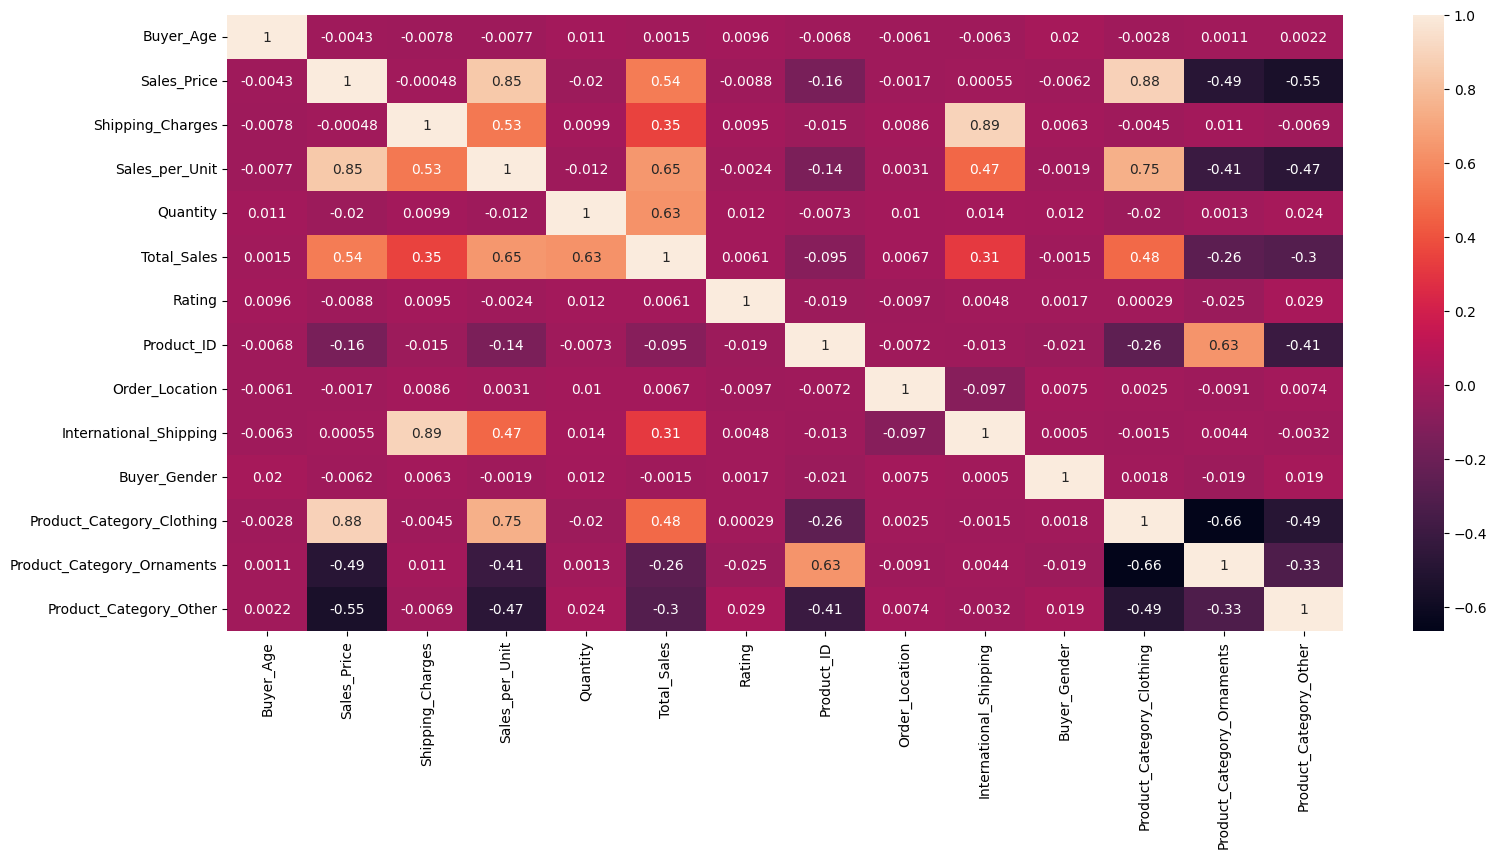

In [171]:
df_num = df.select_dtypes('number')
plt.figure(figsize=(18,8))
sns.heatmap(df_num.corr(),annot=True);

In [172]:
clase =  DataFrameAnalyzer(df)

In [174]:
clase.test_normalidad()

['Columna: Buyer_Age            | Estadístico: 7301.455311 | P-Valor: 0.0',
 'Columna: Sales_Price          | Estadístico: 11067.235175 | P-Valor: 0.0',
 'Columna: Shipping_Charges     | Estadístico: 2097.254617 | P-Valor: 0.0',
 'Columna: Sales_per_Unit       | Estadístico: 381.749346 | P-Valor: 1.2711092360054277e-83',
 'Columna: Quantity             | Estadístico: 1888.061063 | P-Valor: 0.0',
 'Columna: Total_Sales          | Estadístico: 3499.461339 | P-Valor: 0.0',
 'Columna: Rating               | Estadístico: 1455.313184 | P-Valor: 0.0',
 'Columna: Product_ID           | Estadístico: 1131.827599 | P-Valor: 1.6856198212053706e-246',
 'Columna: Order_Location       | Estadístico: 15322.844410 | P-Valor: 0.0',
 'Columna: International_Shipping | Estadístico: 18398.465898 | P-Valor: 0.0',
 'Columna: Buyer_Gender         | Estadístico: 8705.405467 | P-Valor: 0.0',
 'Columna: Product_Category_Clothing | Estadístico: 25526.853198 | P-Valor: 0.0',
 'Columna: Product_Category_Ornaments |

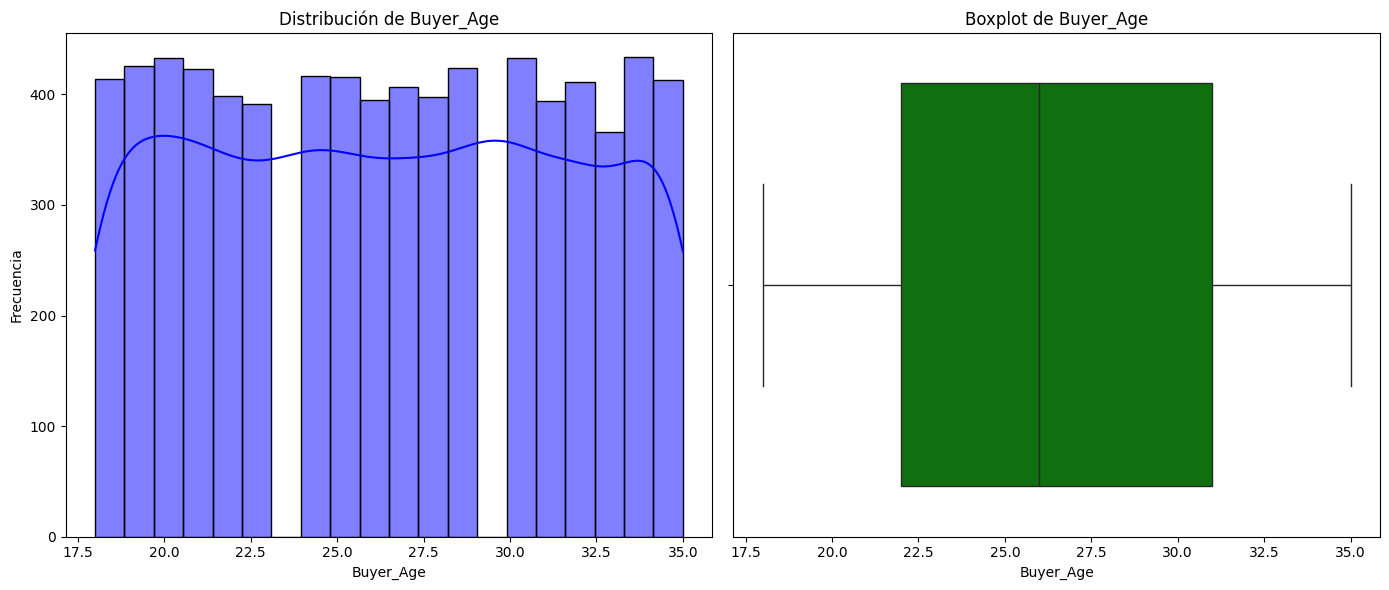

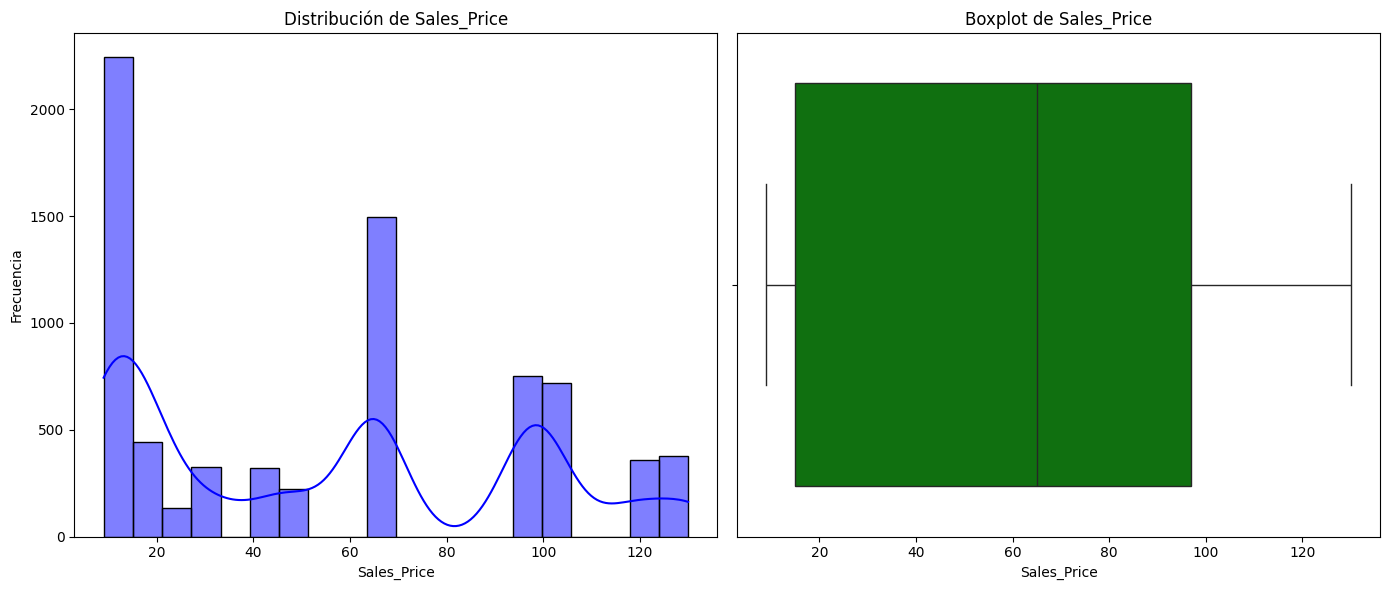

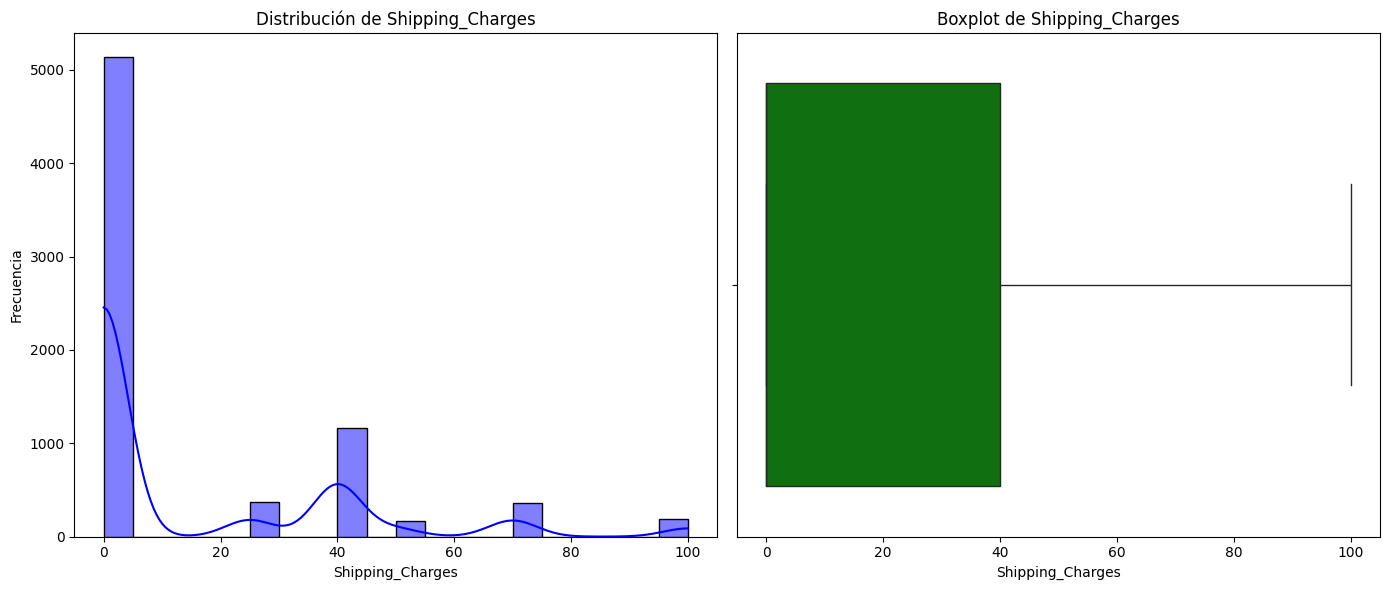

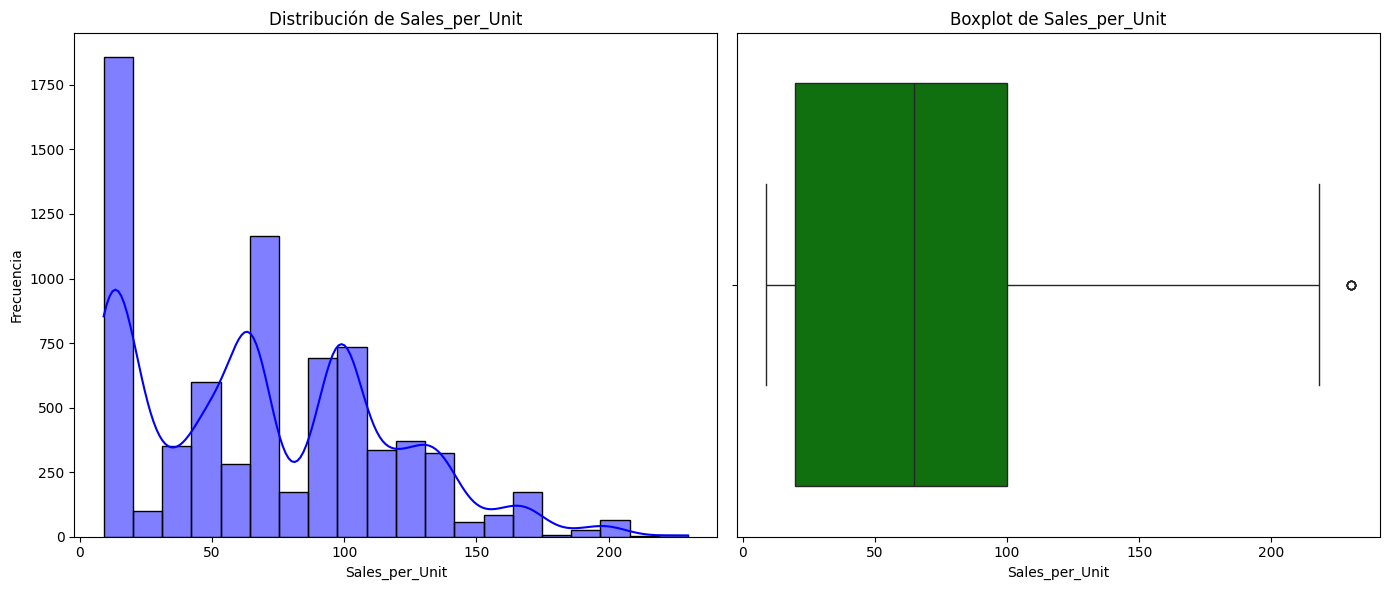

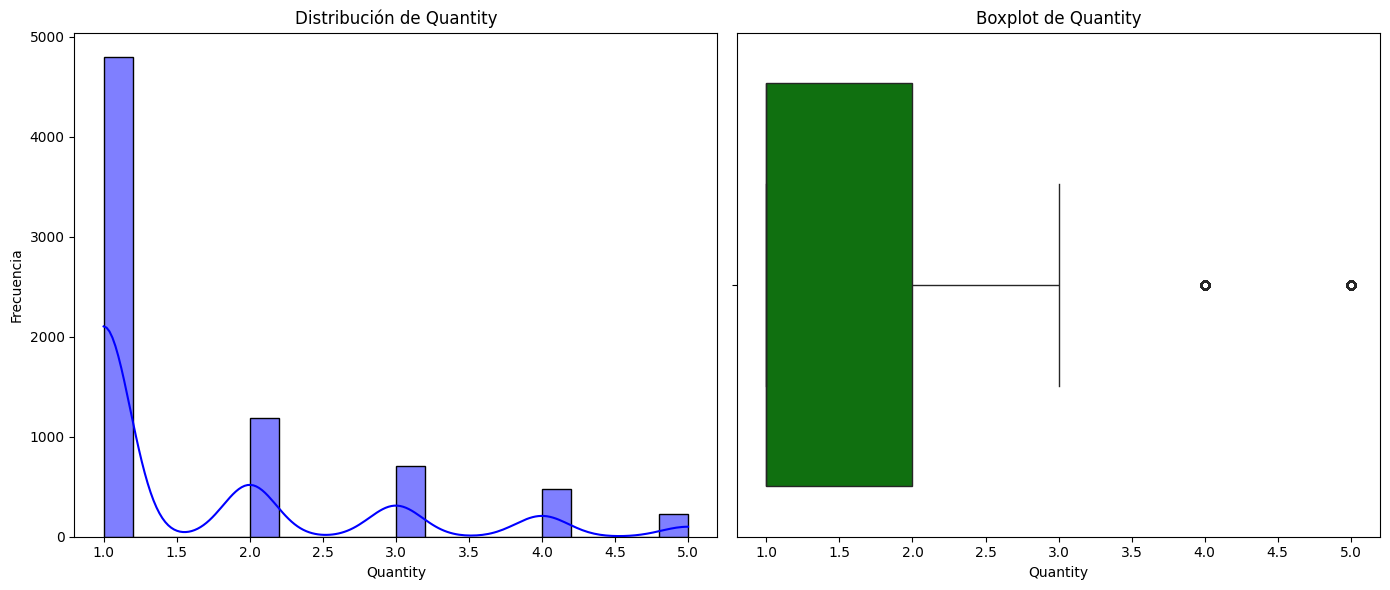

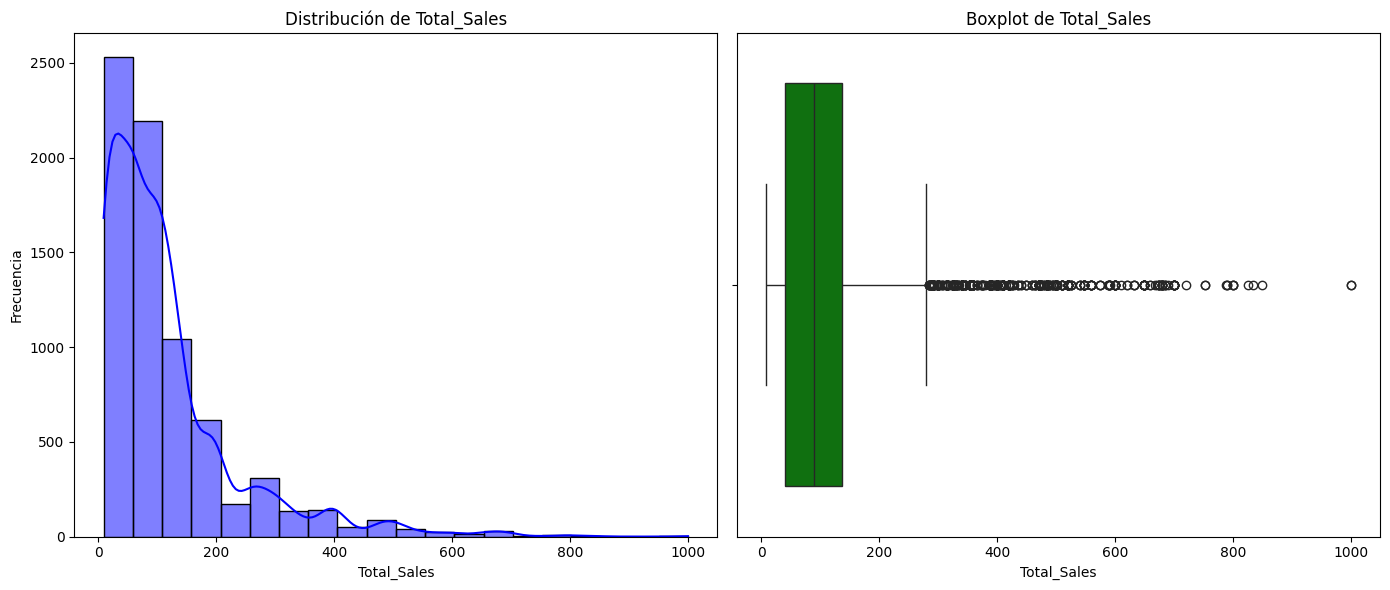

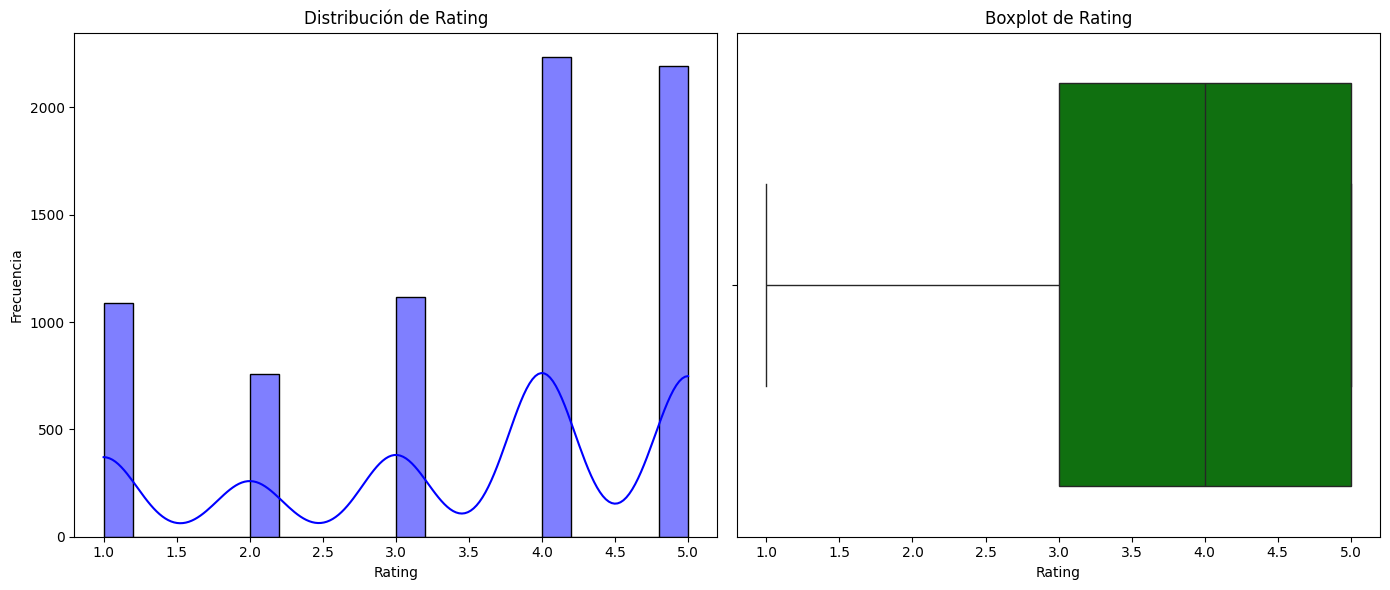

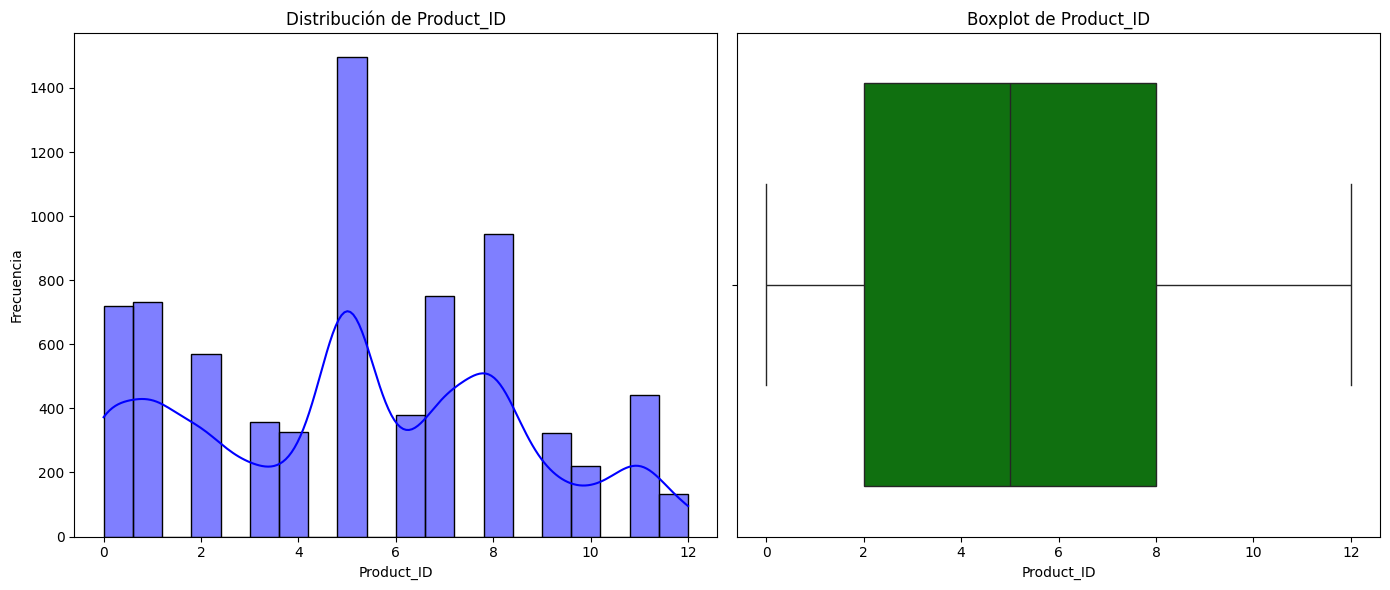

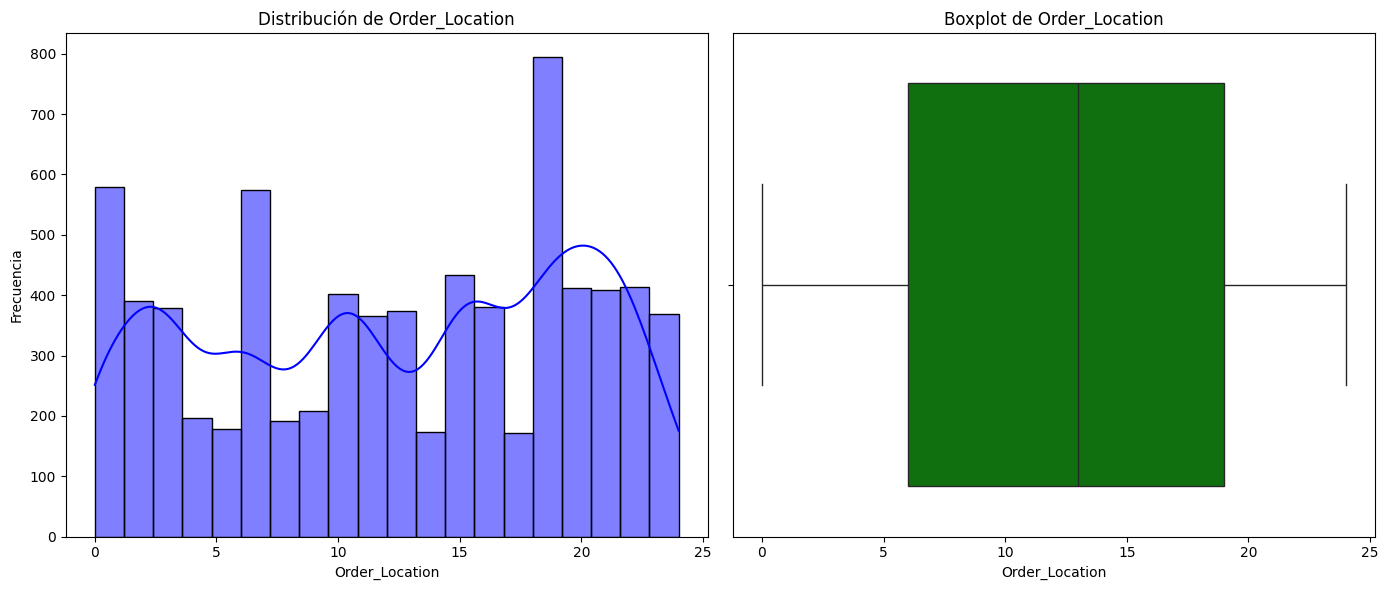

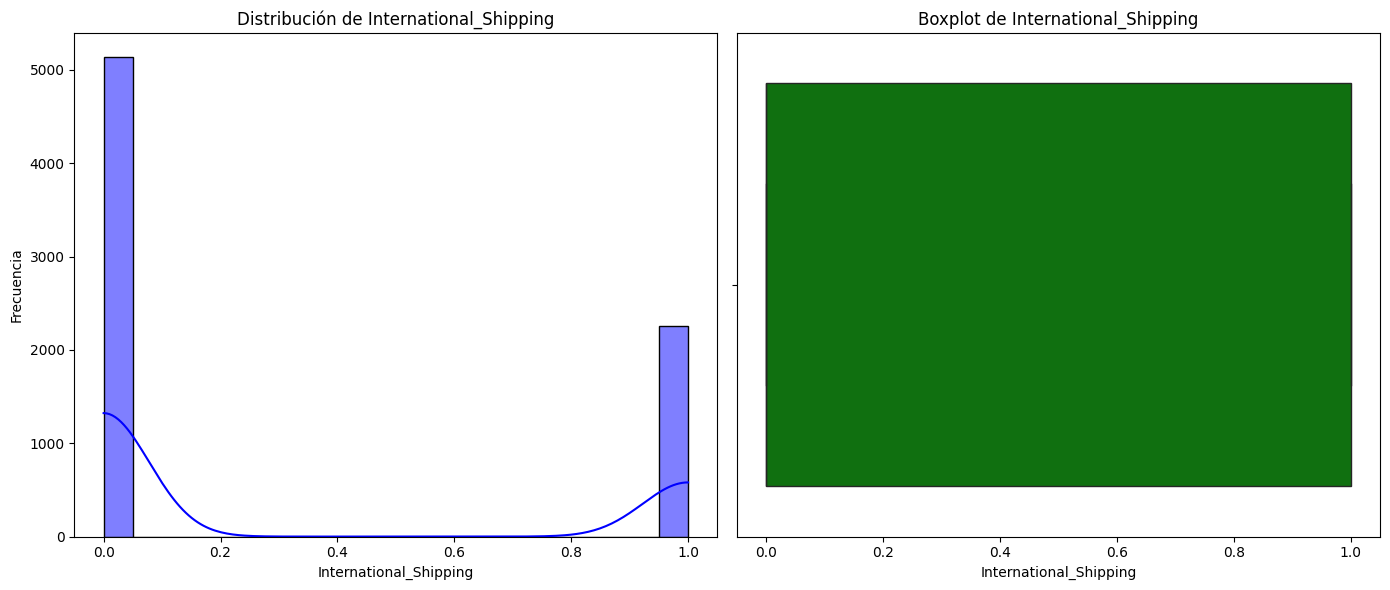

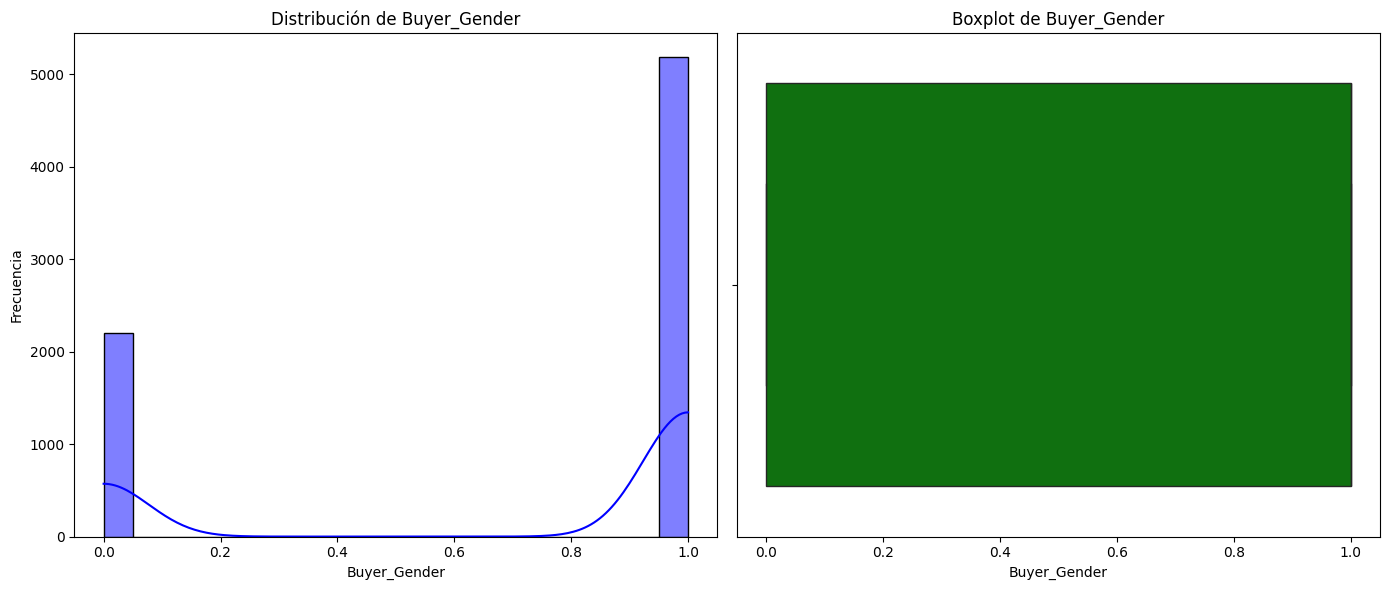

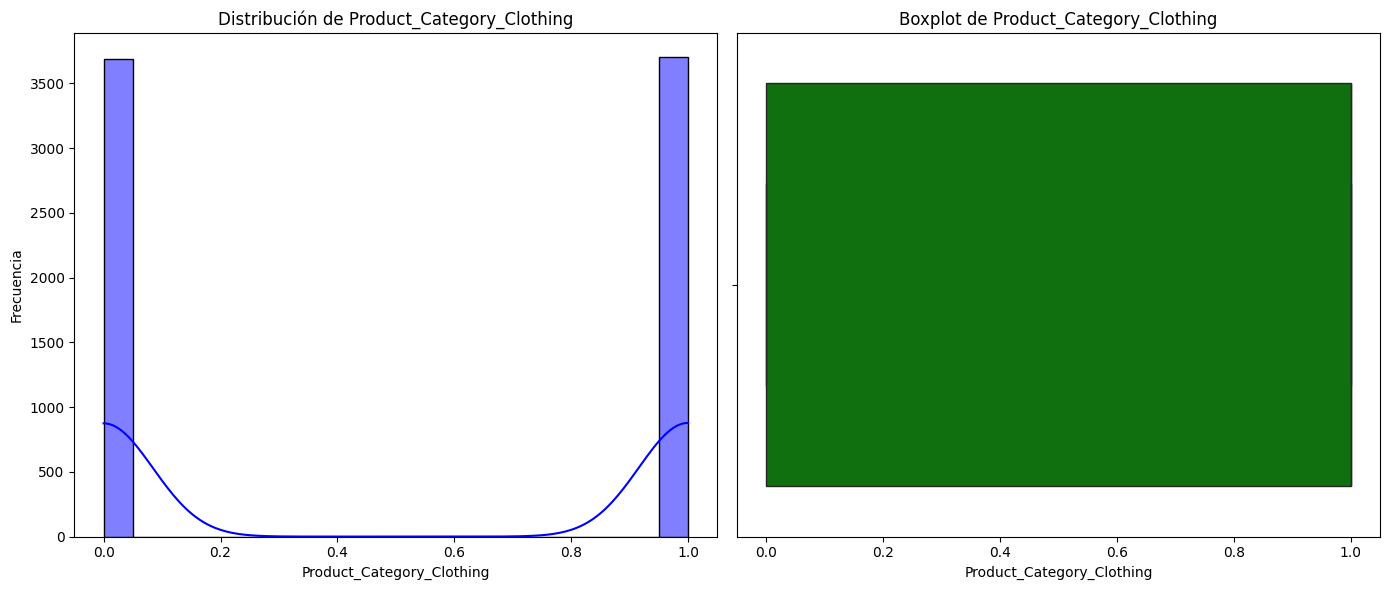

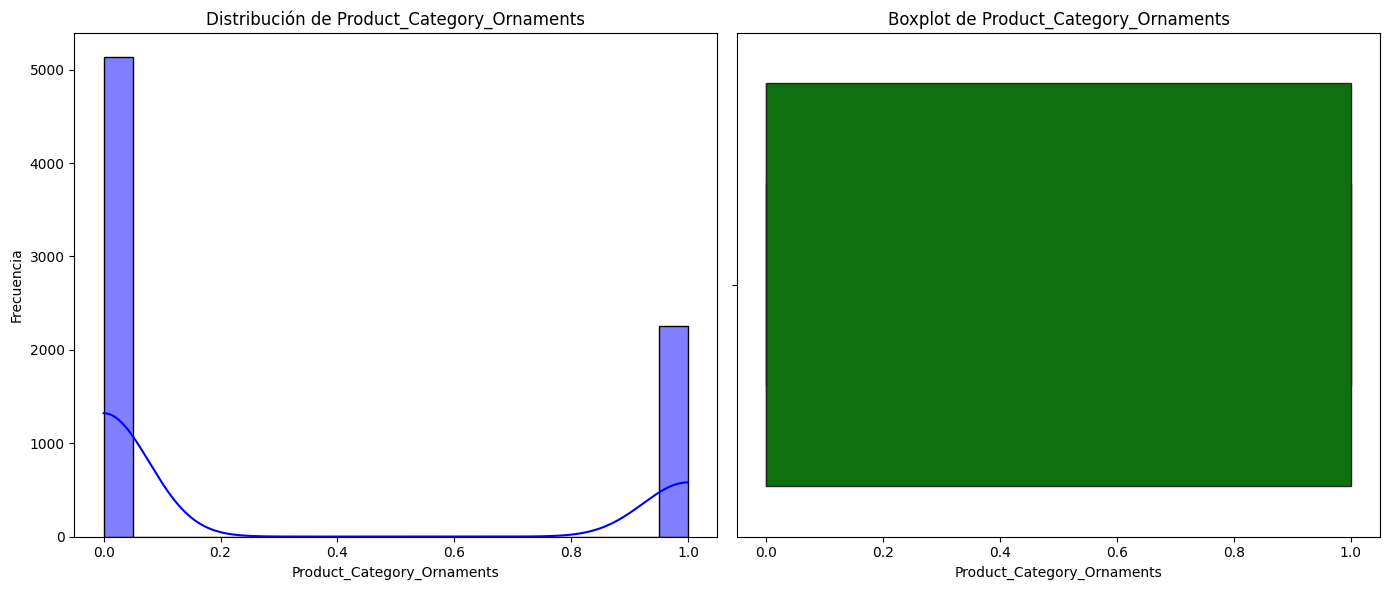

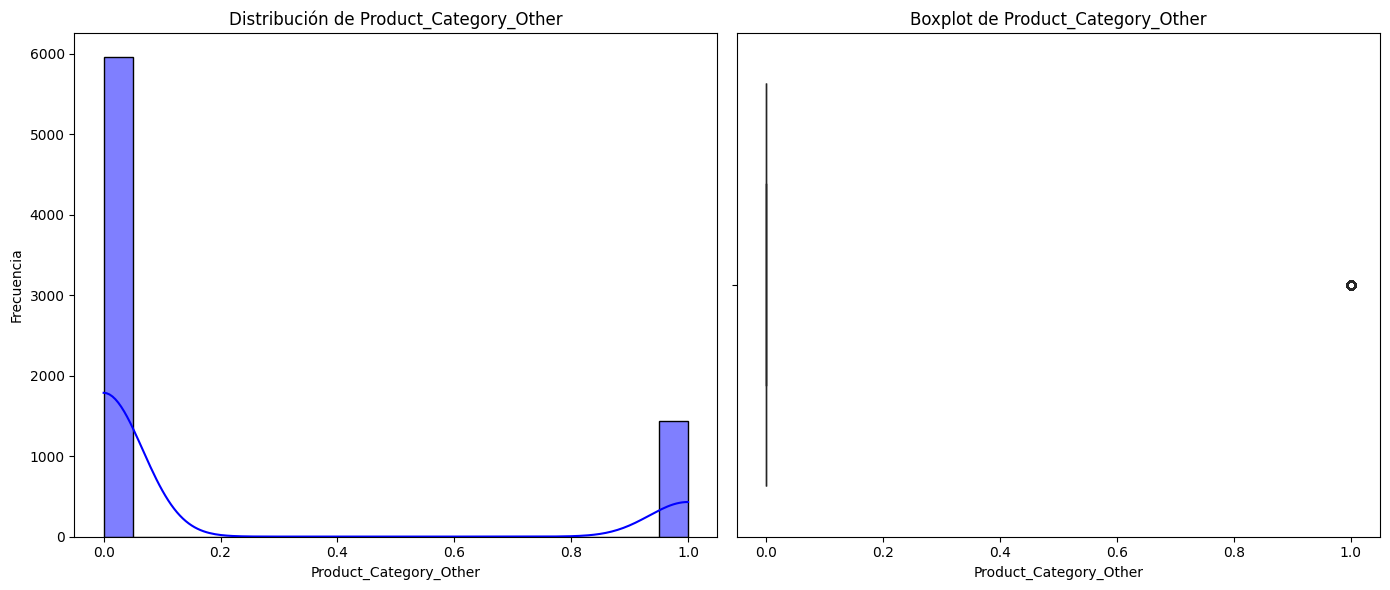

In [175]:
clase.plot_numeric()

Luego de la transformacion de todas las variables quiero aplicar modelos en las siguientes:

**Modelos de Clasificacion:**
- Predecir si una orden conlleva envio internacional o no.
- Predecir el genero comprador de una orden.
- Predecir el rating de una orden.

**Modelos de Regresion:**
- Prediccion de ingresos totales.
- Predecir costos de envios.
- Prediccion de cantidad de productos que compren los usuarios.
- Prediccion de ingresos por producto.
- Ventas totales por ciudad.


**Serie temporal:**
- Con la columna fecha, tratar de predecir las ventas de los proximos meses.
- Hacerlo lo mismo pero por categoria.